In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [17]:
def pendula(alpha):
    def rhs(t, X=[]):
        x, y = X
        return [y, 2 * x - x ** 2 - x ** 3 + alpha * y]

    return rhs


def plotter(rhs, point, times, style):
    tmp = list(times)
    for i in range(2):
        sol = solve_ivp(rhs, tmp, (point[0], point[1]), method='RK45', rtol=1e-4)
        xs, ys = sol.y
        plt.plot(xs, ys, style)
        tmp[1] = -tmp[1]


def eq_quiver(rhs, limits, N=16):
    xlims, ylims = limits
    xs = np.linspace(xlims[0], xlims[1], N)
    ys = np.linspace(ylims[0], ylims[1], N)
    U = np.zeros((N, N))
    V = np.zeros((N, N))
    for i, y in enumerate(ys):
        for j, x in enumerate(xs):
            U[i][j], V[i][j] = rhs(.0, [x, y])
    return xs, ys, U, V


def plot_v_field(rhs, limits, N=16):
    #plt.close()
    xlims, ylims = limits

    plt.xlim([xlims[0], xlims[1]])
    plt.ylim([ylims[0], ylims[1]])

    xs, ys, U, V = eq_quiver(rhs, limits, N)
    plt.quiver(xs, ys, U, V, alpha=0.7)


def plot_trajectory(rhs, points=list(), times=[], style=str()):
    for point in points:
        plotter(rhs, point, times, style)


def plot_points(points):
    for point in points:
        if point['stable']:
            style = 'bo'
        else:
            style = 'rx'
        plt.plot(point['x'], point['y'], style)


def plotter_sep(rhs, point, times, style):
    sol = solve_ivp(rhs, times, (point[0], point[1]), method='RK45', rtol=1e-4)
    xs, ys = sol.y
    plt.plot(xs, ys, style)


def plot_sep(rhs, points, times, alpha, xt=False):
    for point in points:
        if not point['stable']:

            matrix = np.array([[0, 1], [2 - 2 * point['x'] - 3 * (point['x'] ** 2), alpha]])
            vectors = np.linalg.eigh(matrix)[1] / 10
            print(vectors)
            if not xt:
                tmp = times
                plotter_sep(rhs, (point['x'] + vectors[1][0], point['y'] + vectors[1][1]), tmp, 'y-')
                plotter_sep(rhs, (point['x'] - vectors[1][0], point['y'] - vectors[1][1]), tmp, 'y-')

                tmp[1] = -tmp[1]
                plotter_sep(rhs, (point['x'] + vectors[0][0], point['y'] + vectors[0][1]), tmp, 'y-')
                plotter_sep(rhs, (point['x'] - vectors[0][0], point['y'] - vectors[0][1]), tmp, 'y-')
            else:
                tmp = times
                plotter_sep_eq(rhs, (point['x'] + vectors[1][0], point['y'] + vectors[1][1]), tmp, 'y-')
                plotter_sep_eq(rhs, (point['x'] - vectors[1][0], point['y'] - vectors[1][1]), tmp, 'y-')

                tmp[1] = -tmp[1]
                plotter_sep_eq(rhs, (point['x'] + vectors[0][0], point['y'] + vectors[0][1]), tmp, 'y-')
                plotter_sep_eq(rhs, (point['x'] - vectors[0][0], point['y'] - vectors[0][1]), tmp, 'y-')


def plot_xT(rhs, points, times):
    for point in points:
        plotter_xT(rhs, point, times)


def plotter_xT(rhs, point, time):
    plt.close()
    sol = solve_ivp(rhs, time, point, method='RK45', rtol=1e-6)
    x, y = sol.y
    t = sol.t
    plt.plot(t, x)
    plt.show()


def plotter_sep_eq(rhs, point, times, style):
    sol = solve_ivp(rhs, times, (point[0], point[1]), method='RK45', rtol=1e-6)
    xs, ys = sol.y
    t = sol.t
    plt.plot(t, xs, style)
    plt.show()

[[-0.07071068  0.07071068]
 [ 0.07071068  0.07071068]]


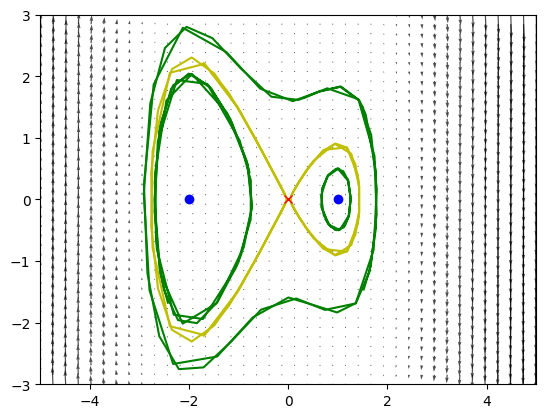

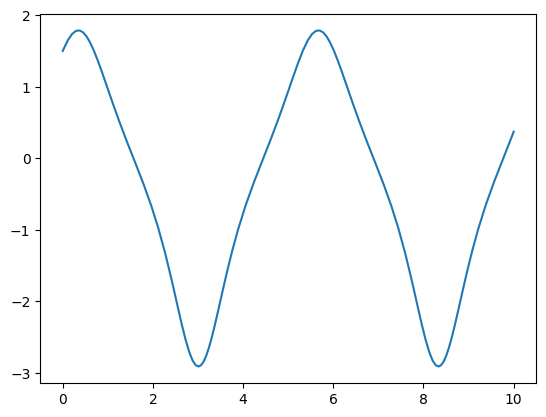

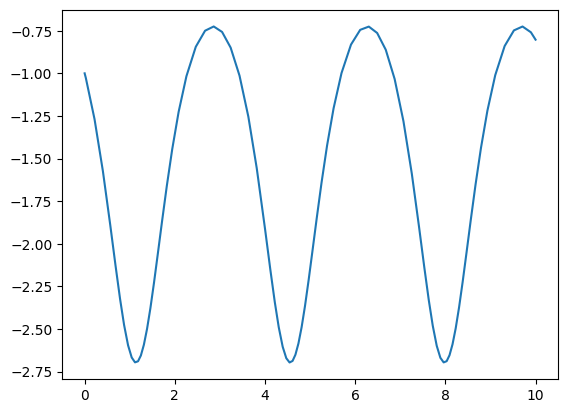

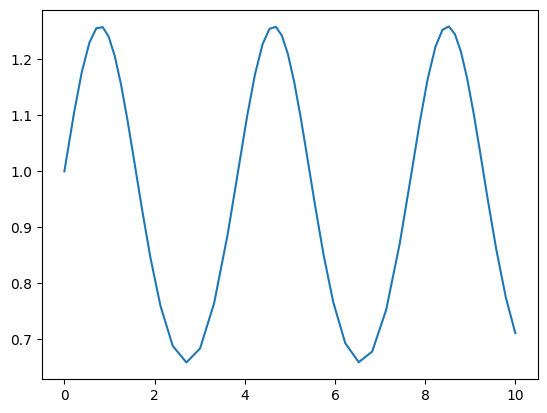

[[-0.07071068  0.07071068]
 [ 0.07071068  0.07071068]]


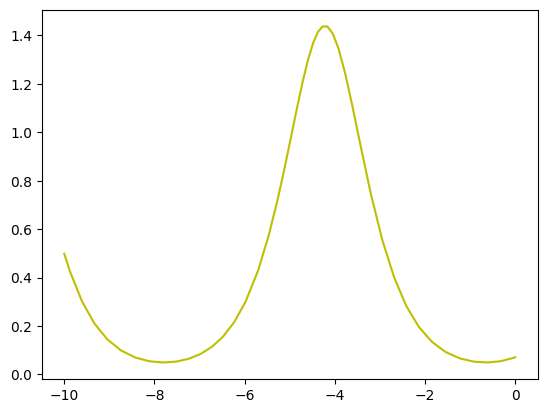

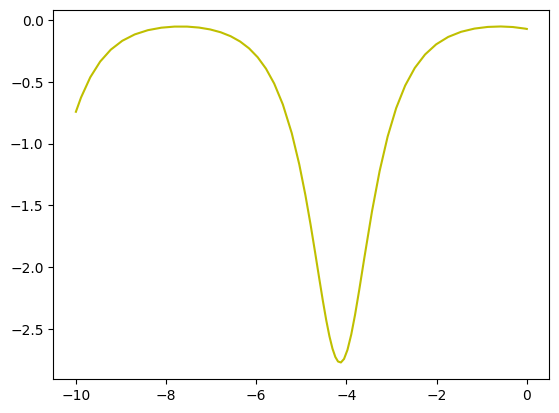

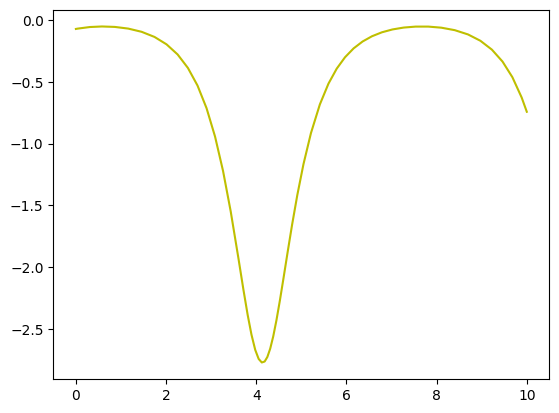

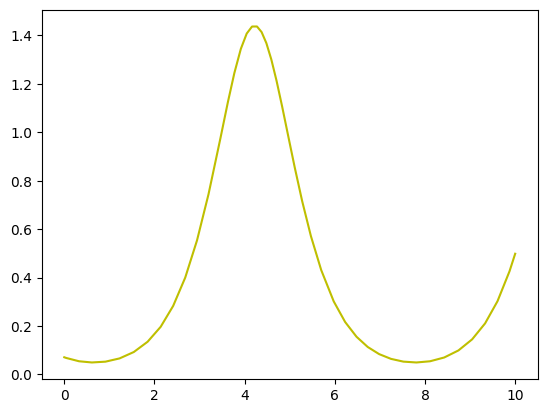

In [4]:
if __name__ == '__main__':
    alpha = 0
    rhs = pendula(alpha)
    eq_points = [{'x': 0, 'y': 0, 'stable': False},
                 {'x': 1, 'y': 0, 'stable': True},
                 {'x': -2, 'y': 0, 'stable': True}]
    points = [(1.5, 1.5), (-1, -1), (1, 0.5)]
    limits = [(-5, 5), (-3, 3)]
    if alpha == 0:
        times = [0, 6]
        times_sep = [0, 10]
        plot_trajectory(rhs, points, times, 'g')
    else:
        times = [0, 3]
        times_sep = [0, 5]
        plot_trajectory(rhs, points, times, 'r')

    plot_v_field(rhs, limits, 40)
    plot_sep(rhs, eq_points, times_sep, alpha)
    plot_points(eq_points)

    plt.show()
    times = (0, 10)
    plot_xT(rhs, points, times)
    plot_sep(rhs, eq_points, times_sep, alpha, xt=True)

[[-0.07071068  0.07071068]
 [ 0.07071068  0.07071068]]


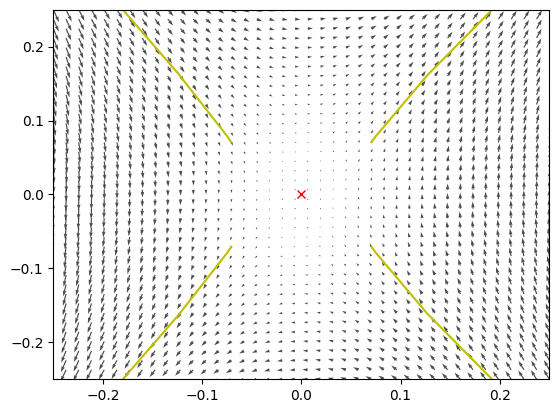

In [5]:
if __name__ == '__main__':
    alpha = 0
    rhs = pendula(alpha)
    eq_points = [{'x': 0, 'y': 0, 'stable': False},
                 {'x': 1, 'y': 0, 'stable': True},
                 {'x': -2, 'y': 0, 'stable': True}]
    points = [(1.5, 1.5), (-1, -1), (1, 0.5)]
    limits = [(-0.25, 0.25), (-0.25, 0.25)]
    times_sep = [0, 2]

    plot_v_field(rhs, limits, 40)
    plot_sep(rhs, eq_points, times_sep, alpha)
    plot_points(eq_points)

In [18]:
def plotter(rhs, point, times, style):
    tmp = list(times)
    for i in range(2):
        sol = solve_ivp(rhs, tmp, (point[0], point[1]), method='RK45', rtol=1e-6)
        xs, ys = sol.y
        plt.plot(xs, ys, style)
        tmp[1] = -tmp[1]


def eq_quiver(rhs, limits, N=16):
    xlims, ylims = limits
    xs = np.linspace(xlims[0], xlims[1], N)
    ys = np.linspace(ylims[0], ylims[1], N)
    U = np.zeros((N, N))
    V = np.zeros((N, N))
    for i, y in enumerate(ys):
        for j, x in enumerate(xs):
            U[i][j], V[i][j] = rhs(.0, [x, y])
    return xs, ys, U, V


def plot_v_field(rhs, limits, N=16):
    #plt.close()
    xlims, ylims = limits

    plt.xlim([xlims[0], xlims[1]])
    plt.ylim([ylims[0], ylims[1]])

    xs, ys, U, V = eq_quiver(rhs, limits, N)
    plt.quiver(xs, ys, U, V, alpha=0.7)


def plot_trajectory(rhs, points=list(), times=[], style=str()):
    for point in points:
        plotter(rhs, point, times, style)


def plot_points(points):
    for point in points:
        if point['stable']:
            style = 'bo'
        else:
            style = 'rx'
        plt.plot(point['x'], point['y'], style)


def plotter_sep(rhs, point, times, style):
    sol = solve_ivp(rhs, times, (point[0], point[1]), method='RK45', rtol=1e-3)
    xs, ys = sol.y
    plt.plot(xs, ys, style)

    
def plot_sep(rhs, points, times, alpha, xt=False):
    for point in points:
        if not point['stable']:

            matrix = np.array([[0, 1], [2 - 2 * point['x'] - 3 * (point['x'] ** 2), alpha]])
            vectors = np.linalg.eigh(matrix)[1] / 10
            print(vectors)
            if not xt:
                tmp = times
                plotter_sep(rhs, (point['x'] + vectors[1][0], point['y'] + vectors[1][1]), tmp, 'y-')
                plotter_sep(rhs, (point['x'] - vectors[1][0], point['y'] - vectors[1][1]), tmp, 'y-')

                tmp[1] = -tmp[1]
                plotter_sep(rhs, (point['x'] + vectors[0][0], point['y'] + vectors[0][1]), tmp, 'y-')
                plotter_sep(rhs, (point['x'] - vectors[0][0], point['y'] - vectors[0][1]), tmp, 'y-')
            else:
                tmp = times
                plotter_sep_eq(rhs, (point['x'] + vectors[1][0], point['y'] + vectors[1][1]), tmp, 'y-')
                plotter_sep_eq(rhs, (point['x'] - vectors[1][0], point['y'] - vectors[1][1]), tmp, 'y-')

                tmp[1] = -tmp[1]
                plotter_sep_eq(rhs, (point['x'] + vectors[0][0], point['y'] + vectors[0][1]), tmp, 'y-')
                plotter_sep_eq(rhs, (point['x'] - vectors[0][0], point['y'] - vectors[0][1]), tmp, 'y-')


def plot_xT(rhs, points, times):
    for point in points:
        plotter_xT(rhs, point, times)


def plotter_xT(rhs, point, time):
    plt.close()
    sol = solve_ivp(rhs, time, point, method='RK45', rtol=1e-6)
    x, y = sol.y
    t = sol.t
    plt.plot(t, x)
    plt.show()


def plotter_sep_eq(rhs, point, times, style):
    sol = solve_ivp(rhs, times, (point[0], point[1]), method='RK45', rtol=1e-6)
    xs, ys = sol.y
    t = sol.t
    plt.plot(t, xs, style)
    plt.show()


[[-0.08944272  0.04472136]
 [ 0.04472136  0.08944272]]


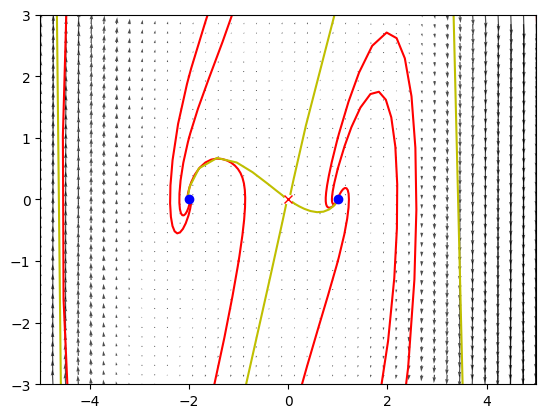

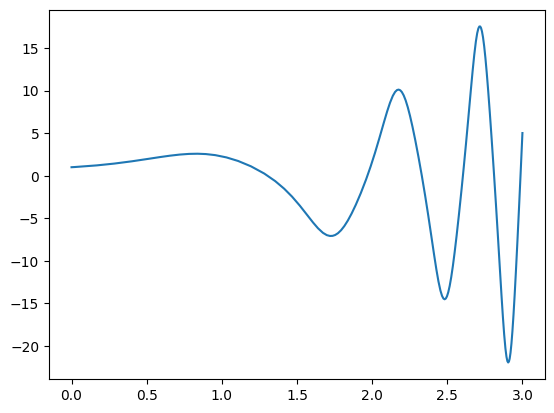

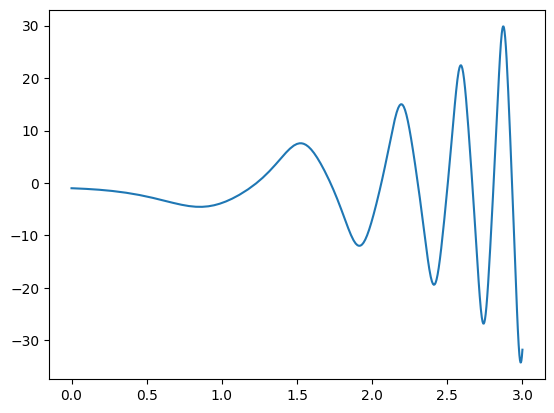

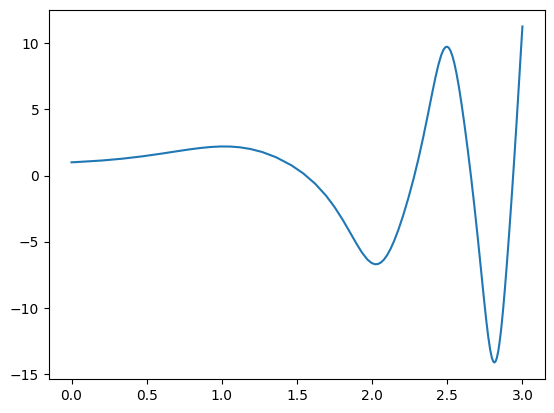

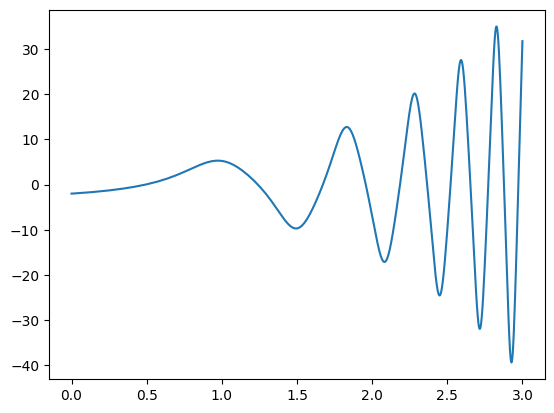

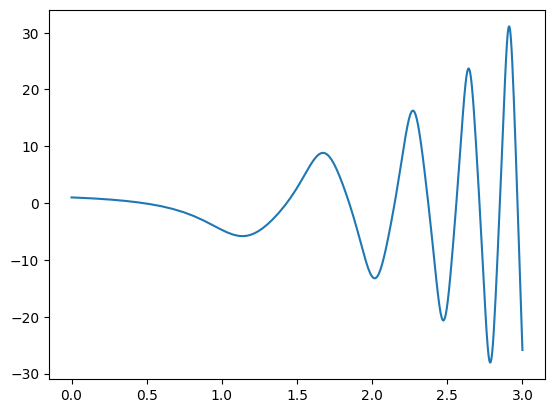

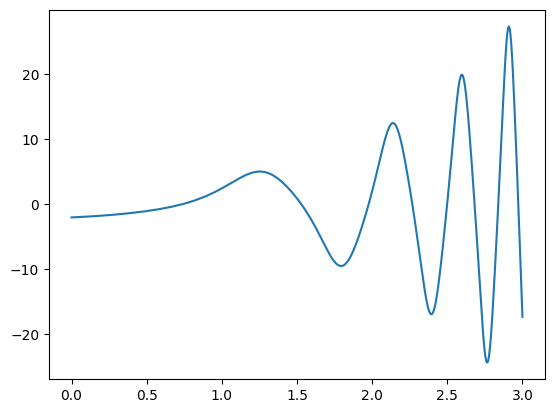

[[-0.08944272  0.04472136]
 [ 0.04472136  0.08944272]]


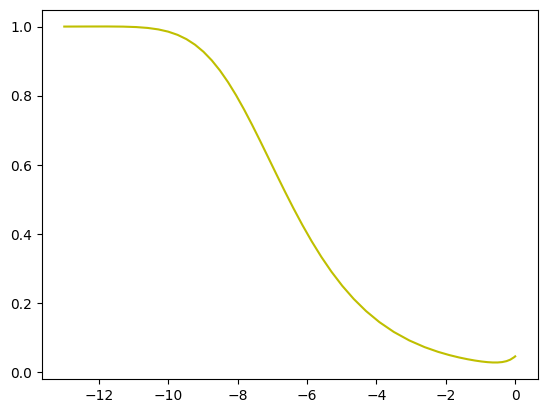

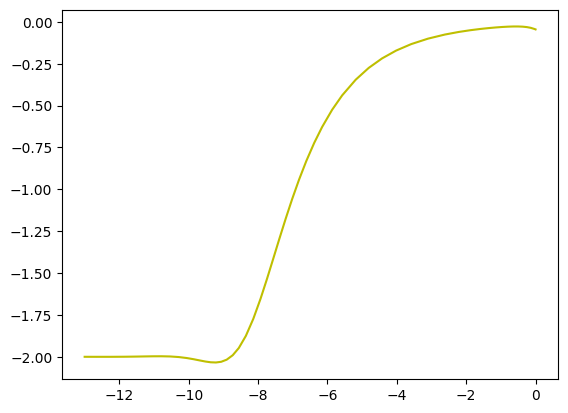

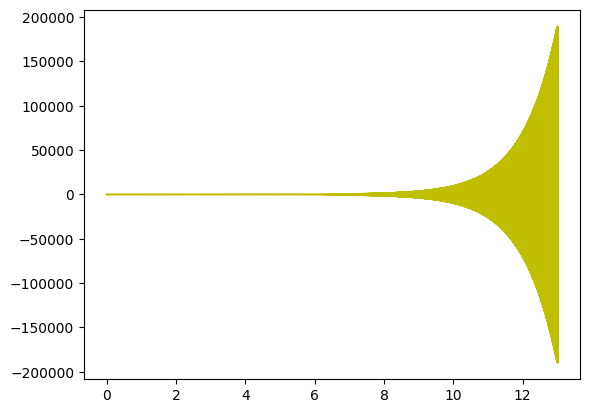

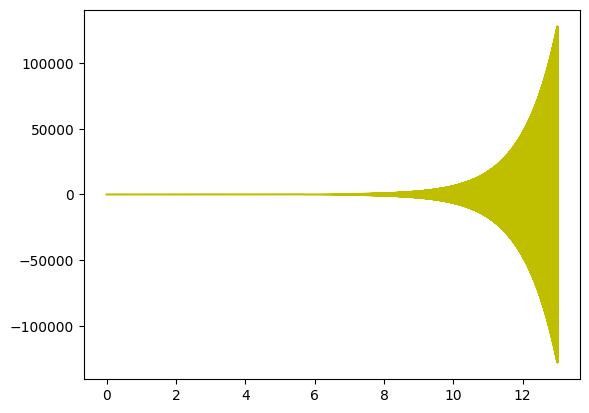

In [28]:
if __name__ == '__main__':
    alpha = 3
    rhs = pendula(alpha)
    eq_points = [{'x': 0, 'y': 0, 'stable': False},
                 {'x': 1, 'y': 0, 'stable': True},
                 {'x': -2, 'y': 0, 'stable': True}]
    points = [(1, 1), (-1, -1), (1, 0.5), (-2, 2), (1, -1), (-2, 1)]
    limits = [(-5, 5), (-3, 3)]
    if alpha == 0:
        times = [0, 7]
        times_sep = [0, 10]
        plot_trajectory(rhs, points, times, 'g')
    else:
        times = [0, 3]
        times_sep = [0, 13]
        plot_trajectory(rhs, points, times, 'r')

    plot_v_field(rhs, limits, 40)
    plot_sep(rhs, eq_points, times_sep, alpha)
    plot_points(eq_points)

    plt.show()
    times = (0, 3)
    plot_xT(rhs, points, times)
    plot_sep(rhs, eq_points, times_sep, alpha, xt=True)

[[-0.08944272  0.04472136]
 [ 0.04472136  0.08944272]]


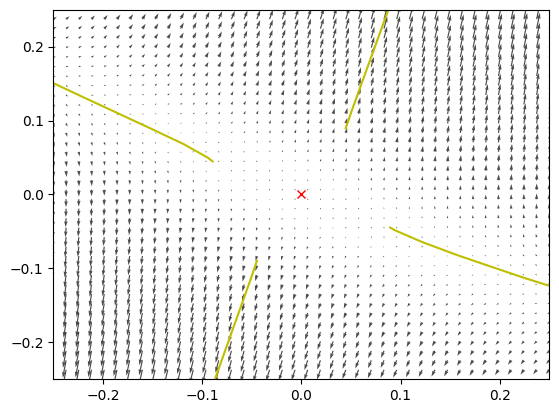

In [7]:
if __name__ == '__main__':
    alpha = 3
    rhs = pendula(alpha)
    eq_points = [{'x': 0, 'y': 0, 'stable': False},
                 {'x': 1, 'y': 0, 'stable': True},
                 {'x': -2, 'y': 0, 'stable': True}]
    points = [(1, 1), (-1, -1), (1, 0.5), (-2, 2), (1, -1), (-2, 1)]
    limits = [(-0.25, 0.25), (-0.25, 0.25)]
    times_sep = [0, 2]

    plot_v_field(rhs, limits, 40)
    plot_sep(rhs, eq_points, times_sep, alpha)
    plot_points(eq_points)

[[-0.09238795  0.03826834]
 [ 0.03826834  0.09238795]]


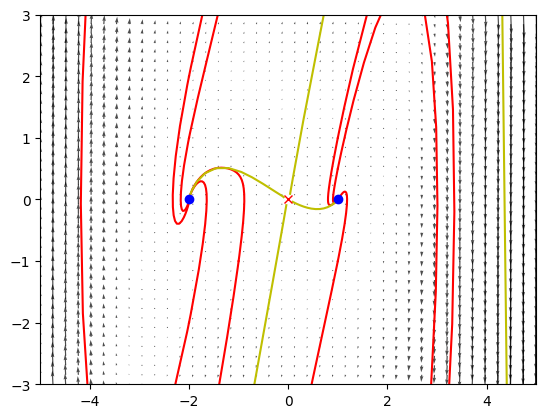

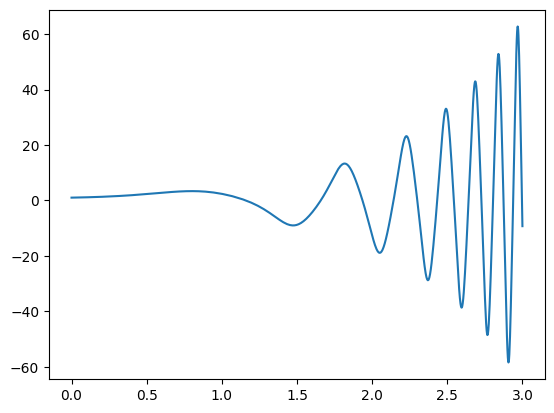

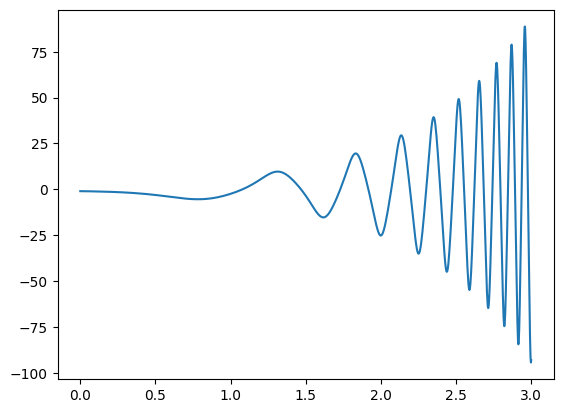

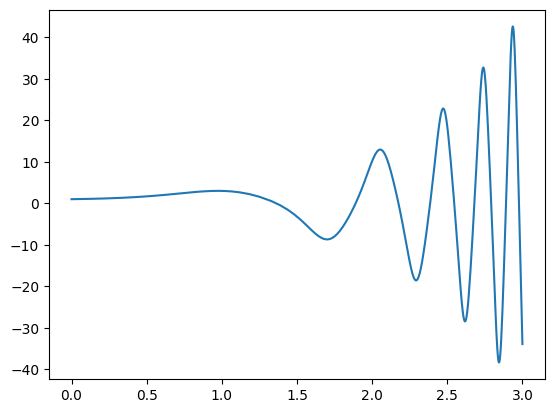

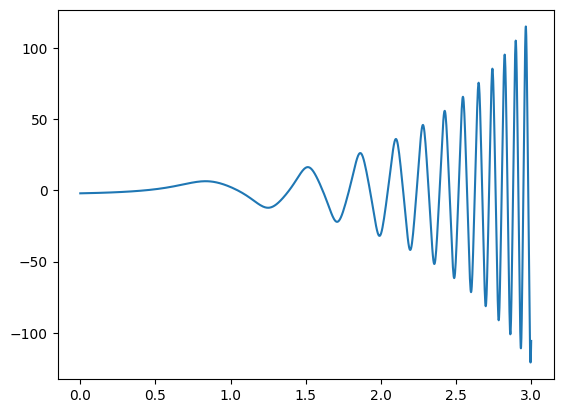

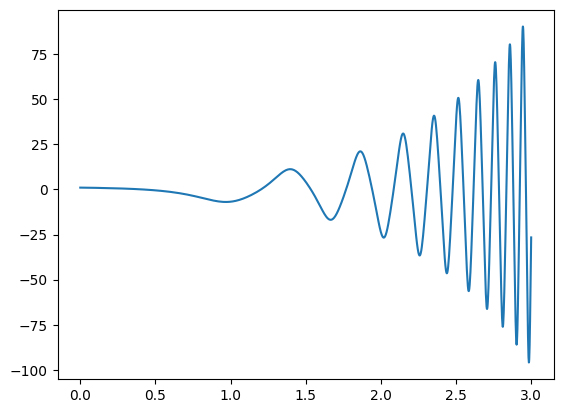

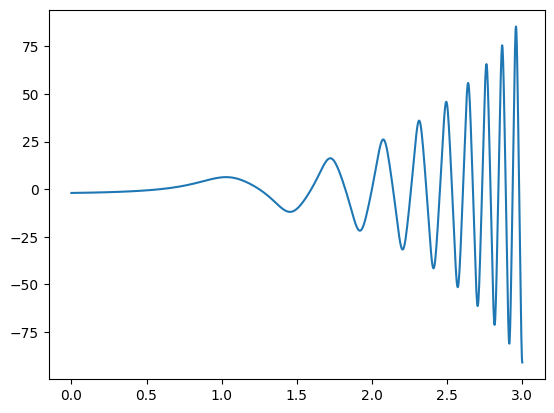

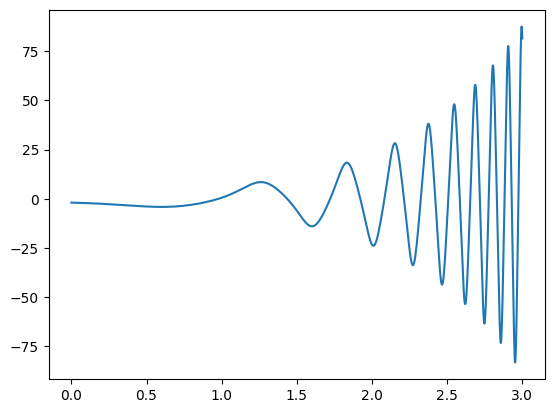

In [8]:
if __name__ == '__main__':
    alpha = 4
    rhs = pendula(alpha)
    eq_points = [{'x': 0, 'y': 0, 'stable': False},
                 {'x': 1, 'y': 0, 'stable': True},
                 {'x': -2, 'y': 0, 'stable': True}]
    points = [(1, 1), (-1, -1), (1, 0.5), (-2, 2), (1, -1), (-2, 1), (-2, -2)]
    limits = [(-5, 5), (-3, 3)]
    if alpha == 0:
        times = [0, 7]
        times_sep = [0, 11]
        plot_trajectory(rhs, points, times, 'g')
    else:
        times = [0, 3]
        times_sep = [0, 11]
        plot_trajectory(rhs, points, times, 'r')

    plot_v_field(rhs, limits, 40)
    plot_sep(rhs, eq_points, times_sep, alpha)
    plot_points(eq_points)

    plt.show()
    times = (0, 3)
    plot_xT(rhs, points, times)
    #plot_sep(rhs, eq_points, times, alpha, xt=True)

[[-0.09238795  0.03826834]
 [ 0.03826834  0.09238795]]


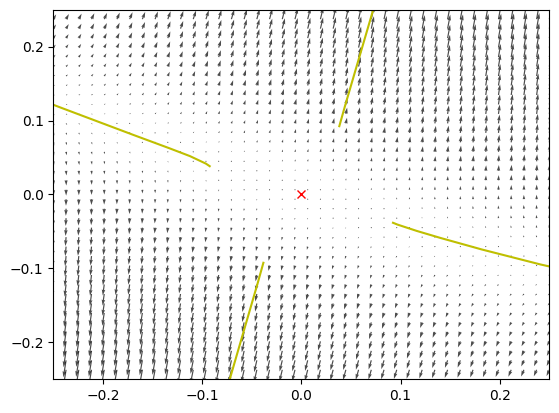

In [9]:
if __name__ == '__main__':
    alpha = 4
    rhs = pendula(alpha)
    eq_points = [{'x': 0, 'y': 0, 'stable': False},
                 {'x': 1, 'y': 0, 'stable': True},
                 {'x': -2, 'y': 0, 'stable': True}]
    points = [(1, 1), (-1, -1), (1, 0.5), (-2, 2), (1, -1), (-2, 1), (-2, -2)]
    limits = [(-0.25, 0.25), (-0.25, 0.25)]
    times_sep = [0, 3]

    plot_v_field(rhs, limits, 40)
    plot_sep(rhs, eq_points, times_sep, alpha)
    plot_points(eq_points)

[[-0.09436283  0.03310069]
 [ 0.03310069  0.09436283]]


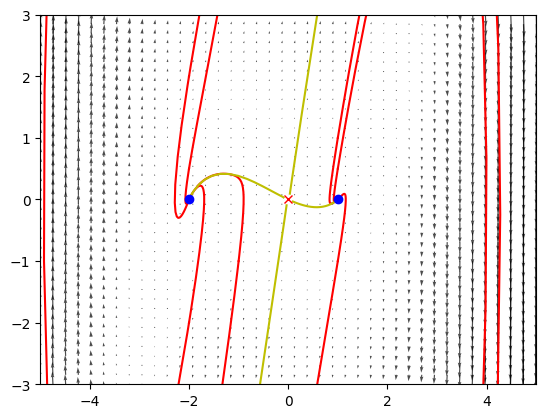

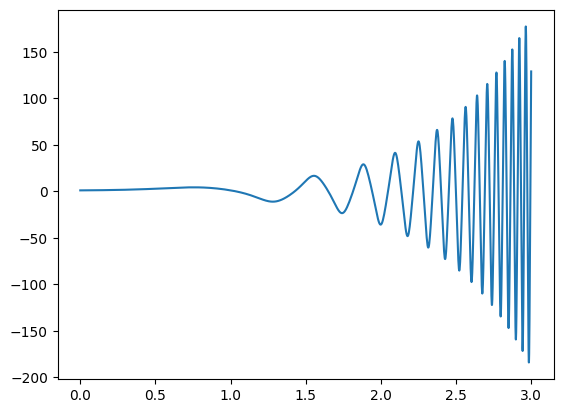

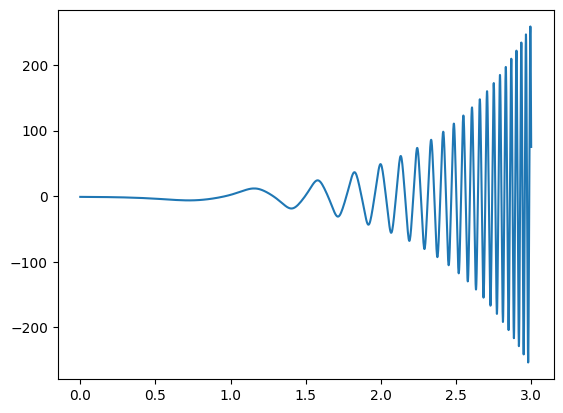

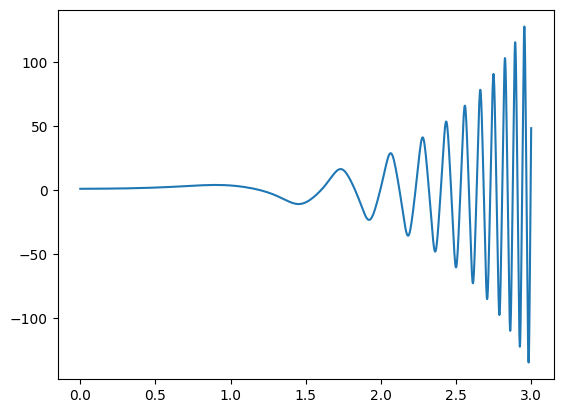

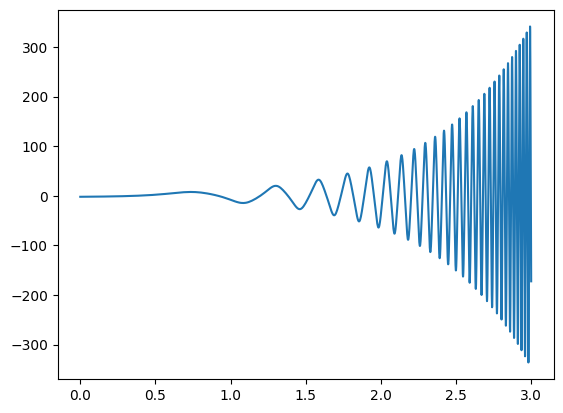

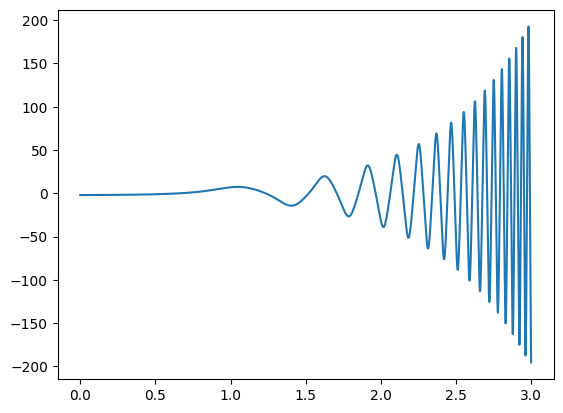

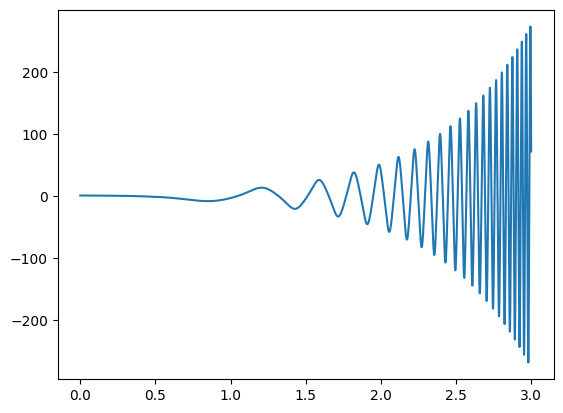

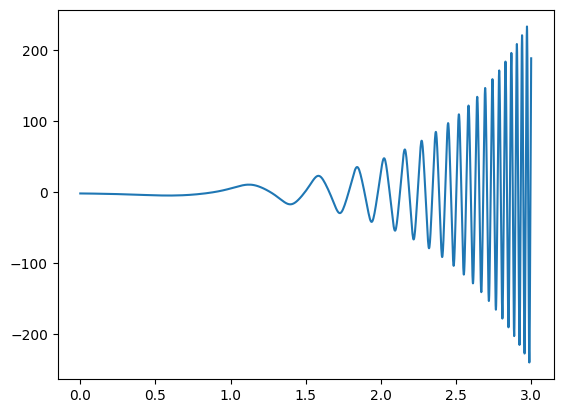

In [40]:
if __name__ == '__main__':
    alpha = 5
    rhs = pendula(alpha)
    eq_points = [{'x': 0, 'y': 0, 'stable': False},
                 {'x': 1, 'y': 0, 'stable': True},
                 {'x': -2, 'y': 0, 'stable': True}]
    points = [(1, 1), (-1, -1), (1, 0.5), (-2, 2), (-2, 0.5), (1, -1), (-2, -2)]
    limits = [(-5, 5), (-3, 3)]
    if alpha == 0:
        times = [0, 7]
        times_sep = [0, 10]
        plot_trajectory(rhs, points, times, 'g')
    else:
        times = [0, 3]
        times_sep = [0, 10]
        plot_trajectory(rhs, points, times, 'r')

    plot_v_field(rhs, limits, 40)
    plot_sep(rhs, eq_points, times_sep, alpha)
    plot_points(eq_points)

    plt.show()
    times = (0, 3)
    plot_xT(rhs, points, times)
    #plot_sep(rhs, eq_points, times, alpha, xt=True)

[[-0.09436283  0.03310069]
 [ 0.03310069  0.09436283]]


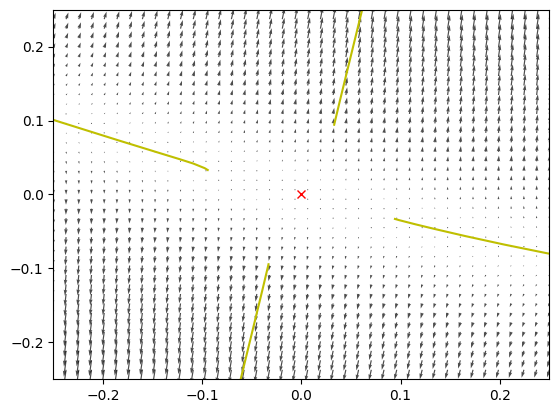

In [10]:
if __name__ == '__main__':
    alpha = 5
    rhs = pendula(alpha)
    eq_points = [{'x': 0, 'y': 0, 'stable': False},
                 {'x': 1, 'y': 0, 'stable': True},
                 {'x': -2, 'y': 0, 'stable': True}]
    points = [(1, 1), (-1, -1), (1, 0.5), (-2, 2), (-2, 0.5), (1, -1), (-2, -2)]
    limits = [(-0.25, 0.25), (-0.25, 0.25)]
    times_sep = [0, 3]

    plot_v_field(rhs, limits, 40)
    plot_sep(rhs, eq_points, times_sep, alpha)
    plot_points(eq_points)

[[-0.06154122 -0.07882054]
 [ 0.07882054 -0.06154122]]


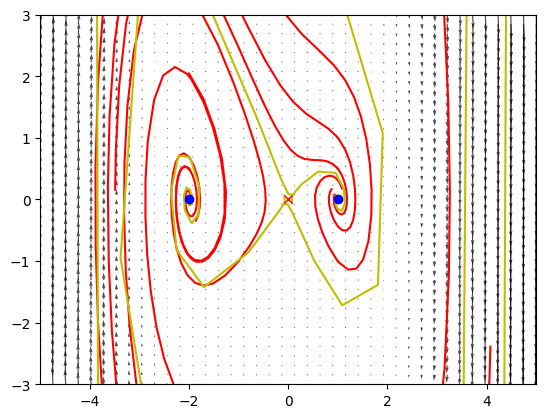

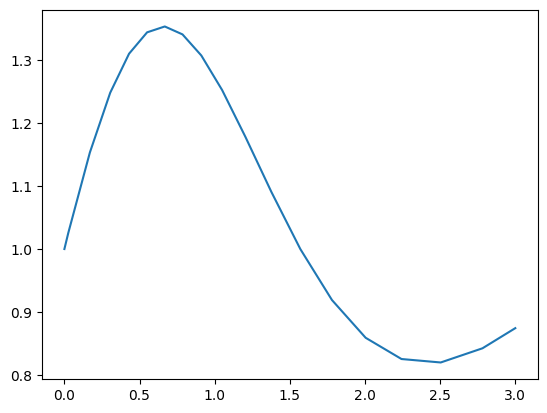

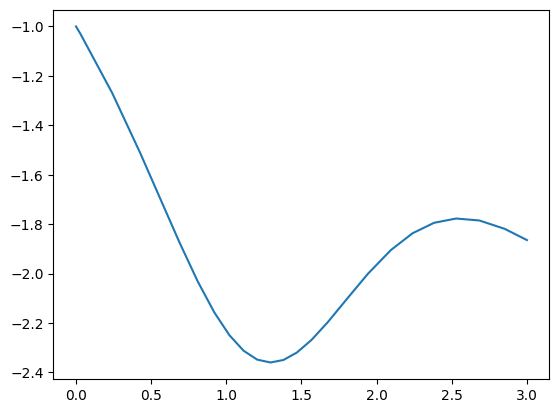

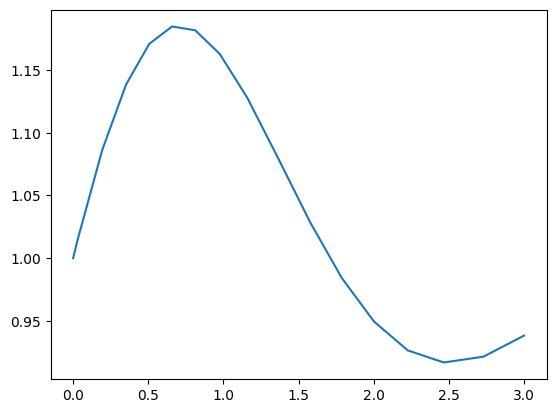

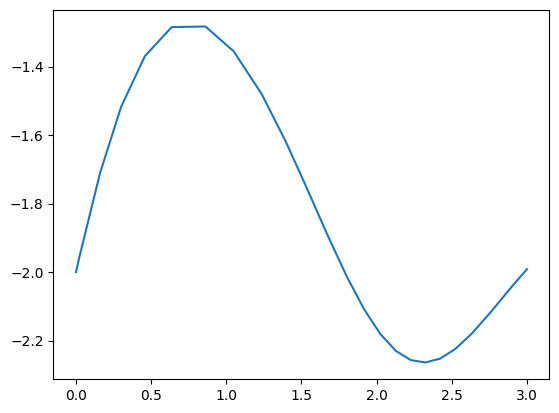

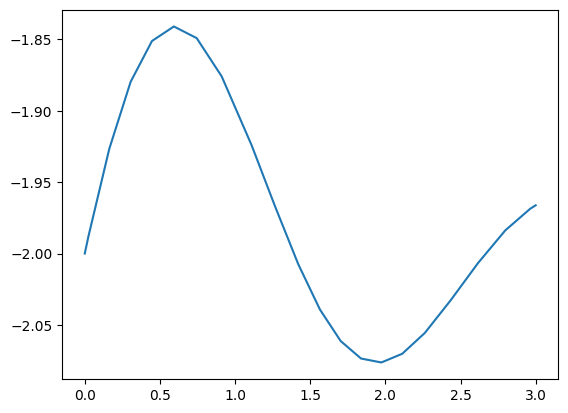

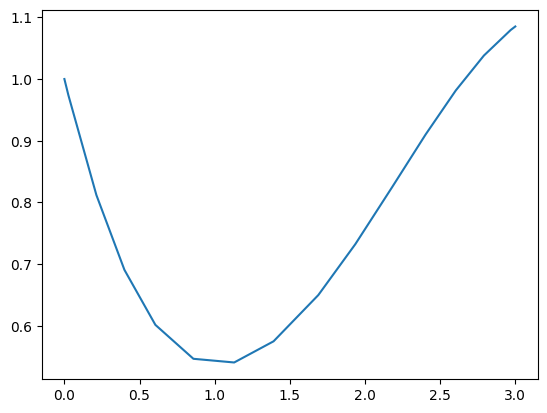

In [11]:
if __name__ == '__main__':
    alpha = -1
    rhs = pendula(alpha)
    eq_points = [{'x': 0, 'y': 0, 'stable': False},
                 {'x': 1, 'y': 0, 'stable': True},
                 {'x': -2, 'y': 0, 'stable': True}]
    points = [(1, 1), (-1, -1), (1, 0.5), (-2, 2), (-2, 0.5), (1, -1)]
    limits = [(-5, 5), (-3, 3)]
    if alpha == 0:
        times = [0, 7]
        times_sep = [0, 10]
        plot_trajectory(rhs, points, times, 'g')
    else:
        times = [0, 3]
        times_sep = [0, 10]
        plot_trajectory(rhs, points, times, 'r')

    plot_v_field(rhs, limits, 40)
    plot_sep(rhs, eq_points, times_sep, alpha)
    plot_points(eq_points)

    plt.show()
    times = (0, 3)
    plot_xT(rhs, points, times)
    #plot_sep(rhs, eq_points, times, alpha, xt=True)

[[-0.00615412 -0.00788205]
 [ 0.00788205 -0.00615412]]


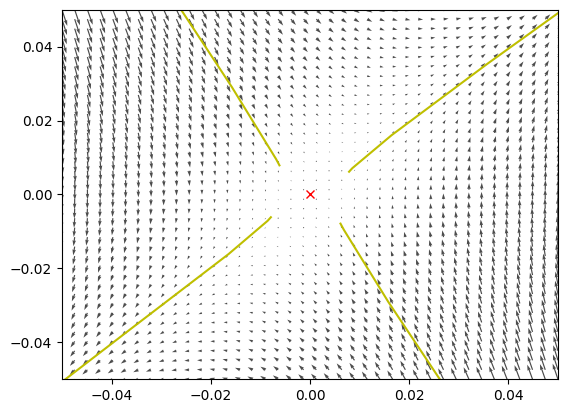

In [12]:
def plot_sep(rhs, points, times, alpha, xt=False):
    for point in points:
        if not point['stable']:

            matrix = np.array([[0, 1], [2 - 2 * point['x'] - 3 * (point['x'] ** 2), alpha]])
            vectors = np.linalg.eigh(matrix)[1] / 100
            print(vectors)
            if not xt:
                tmp = times
                plotter_sep(rhs, (point['x'] + vectors[1][0], point['y'] - vectors[1][1]), tmp, 'y-')
                plotter_sep(rhs, (point['x'] - vectors[1][0], point['y'] + vectors[1][1]), tmp, 'y-')

                tmp[1] = -tmp[1]
                plotter_sep(rhs, (point['x'] + vectors[0][0], point['y'] - vectors[0][1]), tmp, 'y-')
                plotter_sep(rhs, (point['x'] - vectors[0][0], point['y'] + vectors[0][1]), tmp, 'y-')
            else:
                tmp = times
                plotter_sep_eq(rhs, (point['x'] + vectors[1][0], point['y'] + vectors[1][1]), tmp, 'y-')
                plotter_sep_eq(rhs, (point['x'] - vectors[1][0], point['y'] - vectors[1][1]), tmp, 'y-')

                tmp[1] = -tmp[1]
                plotter_sep_eq(rhs, (point['x'] + vectors[0][0], point['y'] + vectors[0][1]), tmp, 'y-')
                plotter_sep_eq(rhs, (point['x'] - vectors[0][0], point['y'] - vectors[0][1]), tmp, 'y-')
                
if __name__ == '__main__':
    alpha = -1
    rhs = pendula(alpha)
    eq_points = [{'x': 0, 'y': 0, 'stable': False},
                 {'x': 1, 'y': 0, 'stable': True},
                 {'x': -2, 'y': 0, 'stable': True}]
    points = [(1, 1), (-1, -1), (1, 0.5), (-2, 2), (-2, 0.5), (1, -1)]
    limits = [(-0.05, 0.05), (-0.05, 0.05)]
    times_sep = [0, 3]

    plot_v_field(rhs, limits, 40)
    plot_sep(rhs, eq_points, times_sep, alpha)
    plot_points(eq_points)

[[-0.03826834 -0.09238795]
 [ 0.09238795 -0.03826834]]


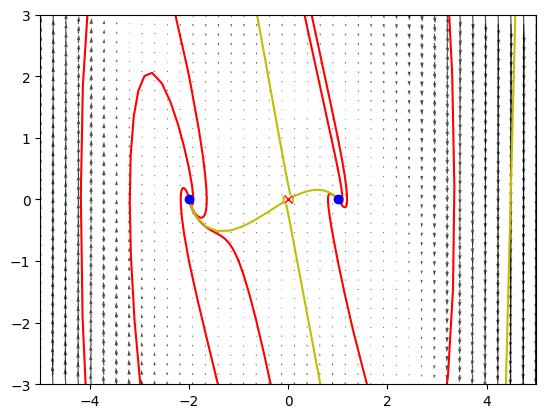

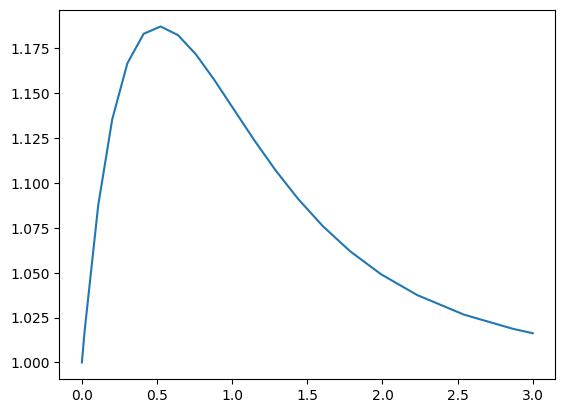

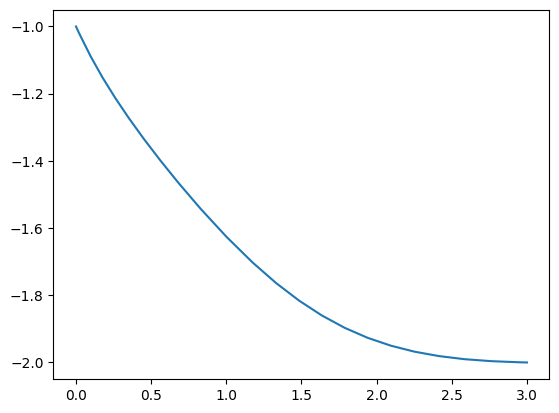

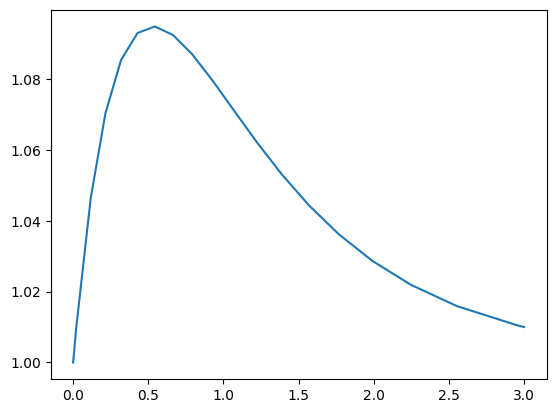

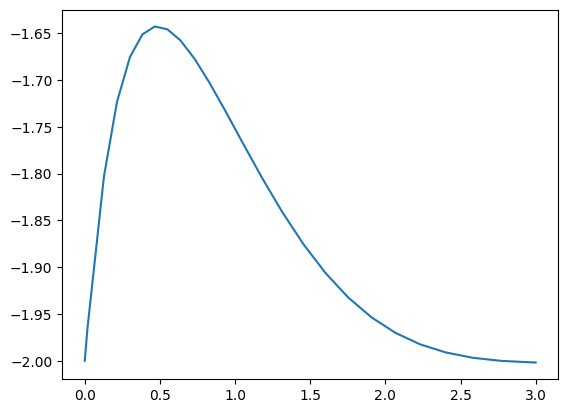

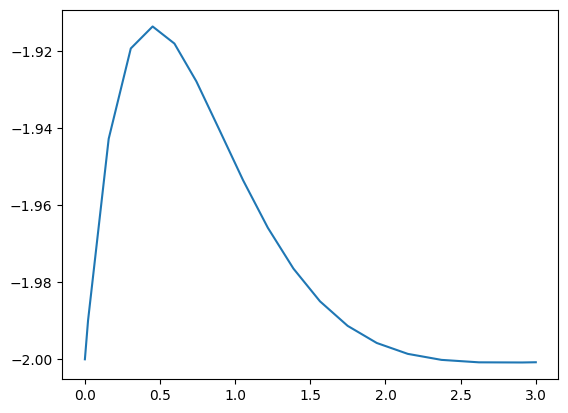

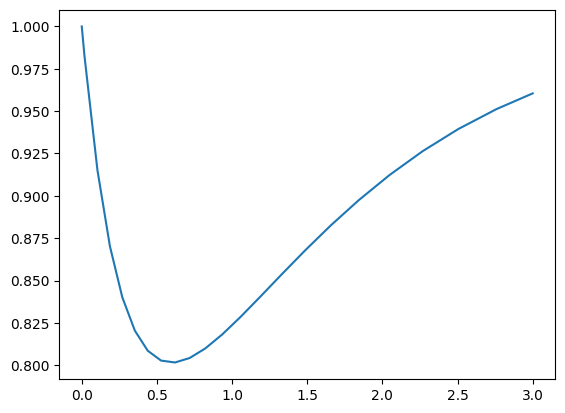

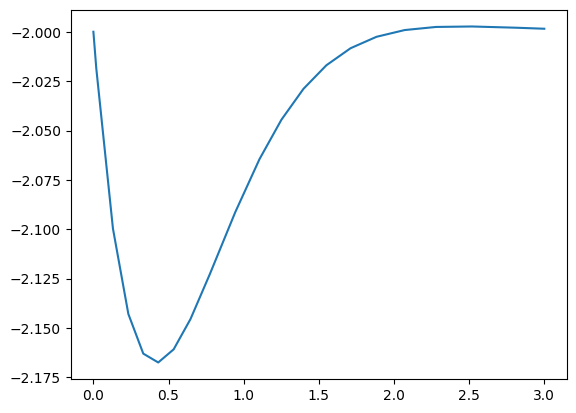

In [20]:
if __name__ == '__main__':
    alpha = -4
    rhs = pendula(alpha)
    eq_points = [{'x': 0, 'y': 0, 'stable': False},
                 {'x': 1, 'y': 0, 'stable': True},
                 {'x': -2, 'y': 0, 'stable': True}]
    points = [(1, 1), (-1, -1), (1, 0.5), (-2, 2), (-2, 0.5), (1, -1), (-2, -1)]
    limits = [(-5, 5), (-3, 3)]
    if alpha == 0:
        times = [0, 7]
        times_sep = [0, 10]
        plot_trajectory(rhs, points, times, 'g')
    else:
        times = [0, 3]
        times_sep = [0, 10]
        plot_trajectory(rhs, points, times, 'r')

    plot_v_field(rhs, limits, 40)
    plot_sep(rhs, eq_points, times_sep, alpha)
    plot_points(eq_points)

    plt.show()
    times = (0, 3)
    plot_xT(rhs, points, times)
    #plot_sep(rhs, eq_points, times, alpha, xt=True)

[[-0.00382683 -0.0092388 ]
 [ 0.0092388  -0.00382683]]


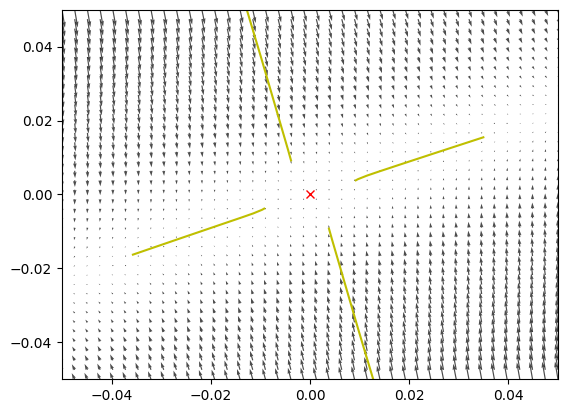

In [14]:
def plot_sep(rhs, points, times, alpha, xt=False):
    for point in points:
        if not point['stable']:

            matrix = np.array([[0, 1], [2 - 2 * point['x'] - 3 * (point['x'] ** 2), alpha]])
            vectors = np.linalg.eigh(matrix)[1] / 100
            print(vectors)
            if not xt:
                tmp = times
                plotter_sep(rhs, (point['x'] + vectors[1][0], point['y'] - vectors[1][1]), tmp, 'y-')
                plotter_sep(rhs, (point['x'] - vectors[1][0], point['y'] + vectors[1][1]), tmp, 'y-')

                tmp[1] = -tmp[1]
                plotter_sep(rhs, (point['x'] + vectors[0][0], point['y'] - vectors[0][1]), tmp, 'y-')
                plotter_sep(rhs, (point['x'] - vectors[0][0], point['y'] + vectors[0][1]), tmp, 'y-')
            else:
                tmp = times
                plotter_sep_eq(rhs, (point['x'] + vectors[1][0], point['y'] + vectors[1][1]), tmp, 'y-')
                plotter_sep_eq(rhs, (point['x'] - vectors[1][0], point['y'] - vectors[1][1]), tmp, 'y-')

                tmp[1] = -tmp[1]
                plotter_sep_eq(rhs, (point['x'] + vectors[0][0], point['y'] + vectors[0][1]), tmp, 'y-')
                plotter_sep_eq(rhs, (point['x'] - vectors[0][0], point['y'] - vectors[0][1]), tmp, 'y-')
                
                
if __name__ == '__main__':
    alpha = -4
    rhs = pendula(alpha)
    eq_points = [{'x': 0, 'y': 0, 'stable': False},
                 {'x': 1, 'y': 0, 'stable': True},
                 {'x': -2, 'y': 0, 'stable': True}]
    points = [(1, 1), (-1, -1), (1, 0.5), (-2, 2), (-2, 0.5), (1, -1), (-2, -1)]
    limits = [(-0.05, 0.05), (-0.05, 0.05)]
    times_sep = [0, 3]

    plot_v_field(rhs, limits, 40)
    plot_sep(rhs, eq_points, times_sep, alpha)
    plot_points(eq_points)

[[-0.03310069 -0.09436283]
 [ 0.09436283 -0.03310069]]


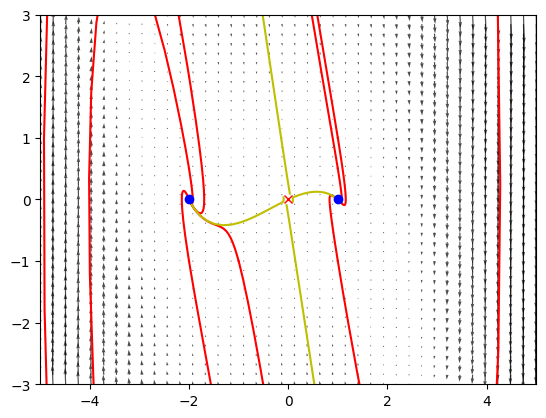

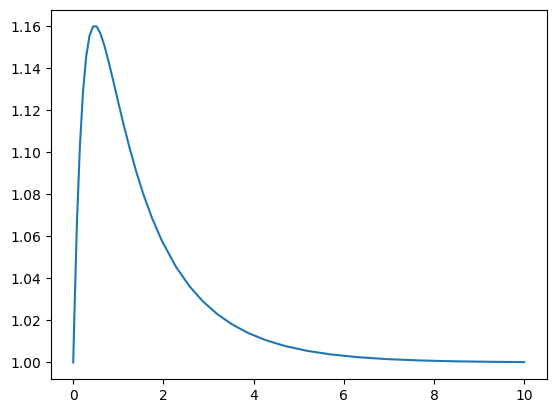

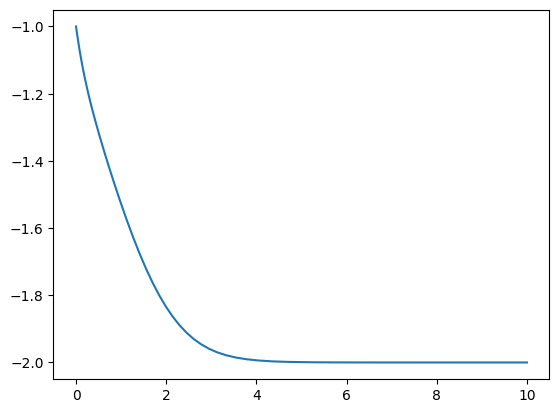

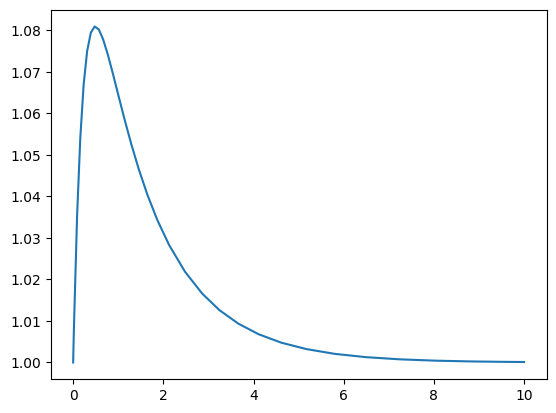

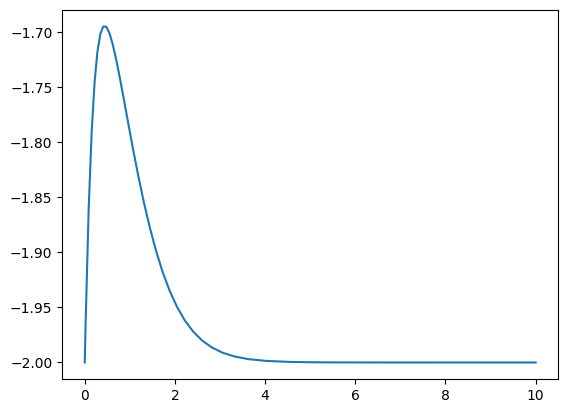

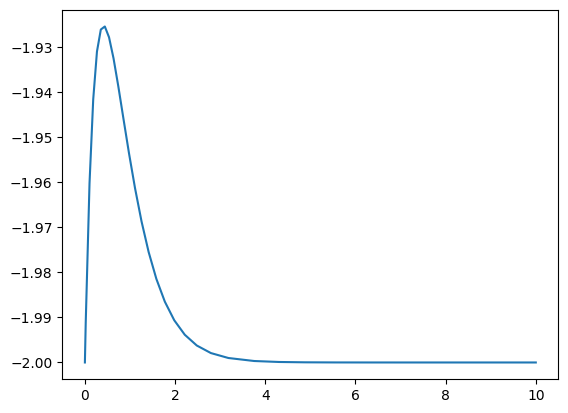

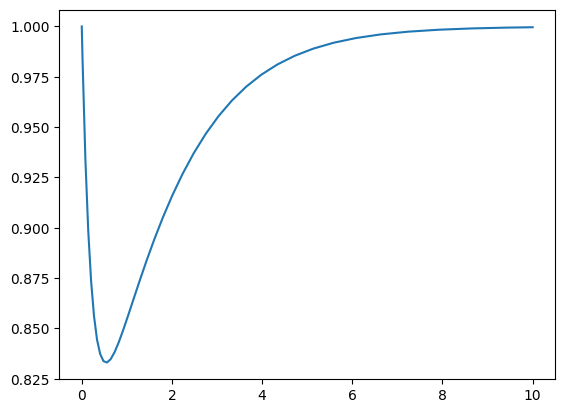

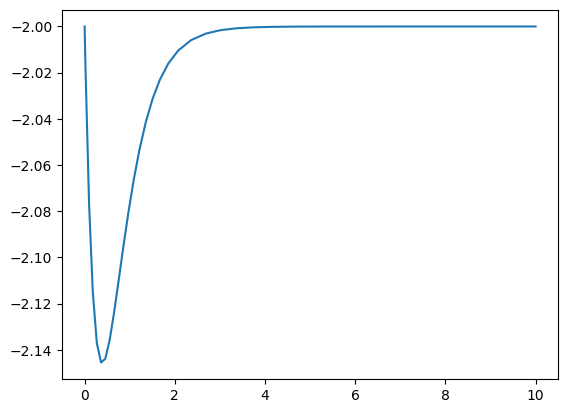

In [19]:
if __name__ == '__main__':
    alpha = -5
    rhs = pendula(alpha)
    eq_points = [{'x': 0, 'y': 0, 'stable': False},
                 {'x': 1, 'y': 0, 'stable': True},
                 {'x': -2, 'y': 0, 'stable': True}]
    points = [(1, 1), (-1, -1), (1, 0.5), (-2, 2), (-2, 0.5), (1, -1), (-2, -1)]
    limits = [(-5, 5), (-3, 3)]
    if alpha == 0:
        times = [0, 7]
        times_sep = [0, 10]
        plot_trajectory(rhs, points, times, 'g')
    else:
        times = [0, 3]
        times_sep = [0, 10]
        plot_trajectory(rhs, points, times, 'r')

    plot_v_field(rhs, limits, 40)
    plot_sep(rhs, eq_points, times_sep, alpha)
    plot_points(eq_points)

    plt.show()
    times = (0, 10)
    plot_xT(rhs, points, times)
    #plot_sep(rhs, eq_points, times, alpha, xt=True)

[[-0.00331007 -0.00943628]
 [ 0.00943628 -0.00331007]]


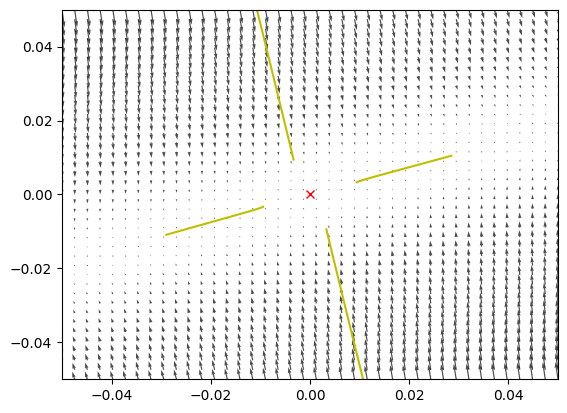

In [16]:
def plot_sep(rhs, points, times, alpha, xt=False):
    for point in points:
        if not point['stable']:

            matrix = np.array([[0, 1], [2 - 2 * point['x'] - 3 * (point['x'] ** 2), alpha]])
            vectors = np.linalg.eigh(matrix)[1] / 100
            print(vectors)
            if not xt:
                tmp = times
                plotter_sep(rhs, (point['x'] + vectors[1][0], point['y'] - vectors[1][1]), tmp, 'y-')
                plotter_sep(rhs, (point['x'] - vectors[1][0], point['y'] + vectors[1][1]), tmp, 'y-')

                tmp[1] = -tmp[1]
                plotter_sep(rhs, (point['x'] + vectors[0][0], point['y'] - vectors[0][1]), tmp, 'y-')
                plotter_sep(rhs, (point['x'] - vectors[0][0], point['y'] + vectors[0][1]), tmp, 'y-')
            else:
                tmp = times
                plotter_sep_eq(rhs, (point['x'] + vectors[1][0], point['y'] + vectors[1][1]), tmp, 'y-')
                plotter_sep_eq(rhs, (point['x'] - vectors[1][0], point['y'] - vectors[1][1]), tmp, 'y-')

                tmp[1] = -tmp[1]
                plotter_sep_eq(rhs, (point['x'] + vectors[0][0], point['y'] + vectors[0][1]), tmp, 'y-')
                plotter_sep_eq(rhs, (point['x'] - vectors[0][0], point['y'] - vectors[0][1]), tmp, 'y-')
                
                
if __name__ == '__main__':
    alpha = -5
    rhs = pendula(alpha)
    eq_points = [{'x': 0, 'y': 0, 'stable': False},
                 {'x': 1, 'y': 0, 'stable': True},
                 {'x': -2, 'y': 0, 'stable': True}]
    points = [(1, 1), (-1, -1), (1, 0.5), (-2, 2), (-2, 0.5), (1, -1), (-2, -1)]
    limits = [(-0.05, 0.05), (-0.05, 0.05)]
    times_sep = [0, 3]

    plot_v_field(rhs, limits, 40)
    plot_sep(rhs, eq_points, times_sep, alpha)
    plot_points(eq_points)